<a href="https://colab.research.google.com/github/engriffi1/Compressive-Sensing-Matrices/blob/main/Compressed_Sensing_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

import scipy.fftpack as spfft
import scipy.ndimage as spimg
import scipy.signal

In [ ]:
!pip install cvxpy

In [ ]:
!pip install sounddevice

In [ ]:
import cvxpy as cvx
#import sounddevice as sd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test (1).wav to test (1).wav


In [ ]:
print(type(uploaded))

<class 'dict'>


In [ ]:
for i in uploaded:
  print(i)

test (1).wav


In [ ]:

f=str(uploaded)
len(f)

24173

In [ ]:


#f=np.sin(np.pi*1394*t)+np.sin(np.pi*3266*t)
rate,f=wavfile.read('test (1).wav')
#n=len(f)
#print([rate,n])

import scipy

#f=scipy.signal.decimate(f,4)
n=len(f)
t=np.linspace(0,1/8,n)
print(n)
np.shape(f)
#f[:, np.newaxis].shape #for adding new axis 


3572


(3572,)

In [ ]:
import numpy as np
n=len(f)
m=int(0.5*n)
r1=np.random.choice(n,m,replace=False)
r1.sort()
t1=t[r1]
f1=f[r1]
#f1=f1[:, np.newaxis]
#plt.plot(t,f,'b',t1,f1,'ro')
print([n,m])
np.shape(f1)


[3572, 1786]


(1786,)

In [ ]:
#Generating RGM for sensing
Sen= np.zeros((m,n))
SenSize=Sen.shape
ri = np.random.normal(0,1,SenSize)
#ri.sort() # sorting not strictly necessary, but convenient for plotting
#t2 = t[ri]
#y2 = np.dot(f1.T,ri)
#y2=np.dot(ri,f1)


# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
#A = np.dot(A,ri.T)
A=np.dot(ri,A)
print(np.shape(A))
f1=np.squeeze(f1)
print(np.shape(f1))

(1786, 3572)
(1786,)


In [ ]:
#A=spfft.idct(np.eye(n),norm='ortho',axis=0)
#A=A[r1]
A=A
vx=cvx.Variable(n)
objective=cvx.Minimize(cvx.norm(vx,1))
constraints=[A*vx==f1]
prob=cvx.Problem(objective,constraints)
result=prob.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +8e+05  7e-01  1e-02  1e+00  1e+02    ---    ---    1  1  - |  -  - 
 1  +8.188e+04  +8.189e+04  +3e+05  4e-01  4e-03  1e+01  4e+01  0.7097  1e-01   1  1  2 |  0  0
 2  +1.254e+05  +1.254e+05  +1e+05  1e-01  1e-03  4e+00  2e+01  0.6819  3e-02   1  1  2 |  0  0
 3  +1.412e+05  +1.412e+05  +4e+04  5e-02  5e-04  2e+00  6e+00  0.6581  9e-02   1  1  2 |  0  0
 4  +1.466e+05  +1.466e+05  +2e+04  2e-02  2e-04  1e+00  3e+00  0.6146  1e-01   1  1  1 |  0  0
 5  +1.492e+05  +1.492e+05  +8e+03  1e-02  1e-04  7e-01  1e+00  0.6871  2e-01   1  1  1 |  0  0
 6  +1.502e+05  +1.502e+05  +4e+03  5e-03  5e-05  4e-01  6e-01  0.6363  2e-01   1  1  1 |  0  0
 7  +1.507e+05  +1.507e+05  +2e+03  2e-03  2e-05  2e-01  2e-01  0.6857  1e-01   1  1  1 |  0  0
 8  +1.509e+05  +1.509e+05  +8e+02  9e-04  9e-

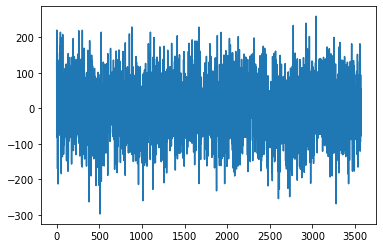

In [ ]:
import matplotlib.pyplot as plt
x=spfft.idct(vx.value,norm='ortho',axis=0)
plt.plot(x)

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(A,f1) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16791219.70236181, tolerance: 2649974.0102762035
  positive)


Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

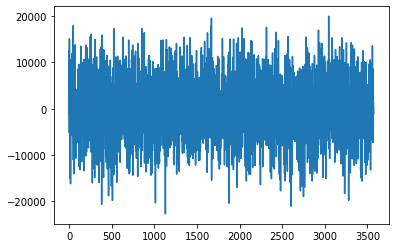

In [ ]:
f1r=spfft.idct(lasso.coef_)
plt.plot(f1r)

In [ ]:
x=np.array(vx.value)
x=np.squeeze(x)
sig=spfft.dct(x,norm='ortho',axis=0)

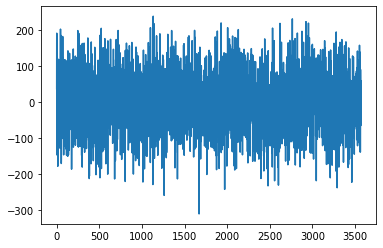

In [ ]:
plt.plot(sig)

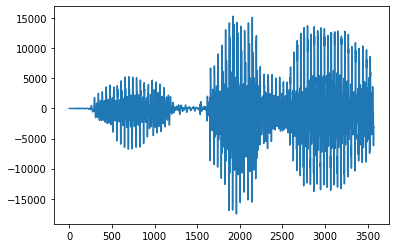

In [ ]:
plt.plot(f)

In [ ]:
import numpy as np
import scipy as sp

In [ ]:
mse=(np.sum((f-sig)**2))/n

In [ ]:
print(mse)

2769398.8018951337


In [ ]:
x=np.float64(f)

In [ ]:
y=np.float64(sig)

In [ ]:
mse=(np.sum((x-y)**2))/n

In [ ]:
print(mse)

2769398.8018951337


In [ ]:
!pip install xlswriter

  Could not find a version that satisfies the requirement xlswriter (from versions: )
No matching distribution found for xlswriter


In [ ]:
print(mse_act)

106.12741641337387


In [ ]:
import pandas as pd

In [ ]:
df1=pd.DataFrame(f)

In [ ]:
df2=pd.DataFrame(sig)

In [ ]:
print(sig)

[  -9.19506541   14.35473984  -21.4392209  ...  -63.67170733 -872.66949208
 -156.78598378]


In [ ]:
print(f)

[ 0.01264947 -0.90373033 -1.71373948 ... -1.09098971 -0.92544142
 -0.1885906 ]


In [ ]:
import pandas as pd
df1.to_excel('data_set_1.xlsx')

In [ ]:
df2.to_excel('data_set_2.xlsx')

In [ ]:
from google.colab import files

files.download('data_set_2.xlsx')
